# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [48]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


---

## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [49]:
# Display a description of the dataset
display(data.describe())
display(data.columns)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

---

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [50]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,10,50]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,3366,5403,12974,4400,5977,1744
2,6269,1095,1980,3860,609,2162


---

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

$${\#sample}_{comparison} = {{\#sample}_{value} \over {mean}_{value}}$$


| #Sample | Fresh (%) | Milk (%) | Grocery (%) | Frozen (%) | Det_Pap. (%) | Delicat. (%) |
|:-------:|:---------:|:--------:|:-----------:|:----------:|:------------:|:------------:|
|    #1   |    0.58   |   1.69   |     1.20    |    0.57    |     1.14     |     1.16     |
|    #2   |    0.28   |   0.93   |     1.63    |    1.43    |     2.07     |     1.14     |
|    #3   |    0.52   |   0.18   |     0.24    |    1.25    |     0.21     |     1.41     |


### Insights:

- #Sample1 : Sample 1 looks like a market. Milk, Grocery, Det_Paper, and Delicatessen had higher values in these objects compared to the mean value. Items encountered in standard markets.

- #Sample2 : Sample 2 looks like a market. Grocery, Frozen, Det_Paper, and Delicatessen. had higher values in these objects compared to the mean value. Items encountered in standard markets.

- #Sample3 : Sample 3 looks like a bakery. Frozen and Delicatessen had higher values in these items compared to the mean value. Some products found in the bakery.



---

# Checking the chosen samples and mean values

In [51]:
print("Mean Values of the original dataset: ")
display(data.mean())
print("")
print("")
print("Print the samples to compare with the mean values: ")
display(samples)

Mean Values of the original dataset: 


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64



Print the samples to compare with the mean values: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,3366,5403,12974,4400,5977,1744
2,6269,1095,1980,3860,609,2162


---

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

---
# Analyzing linear correlation between dataframe variables using Pearson Correlation

C:\Users\lucch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


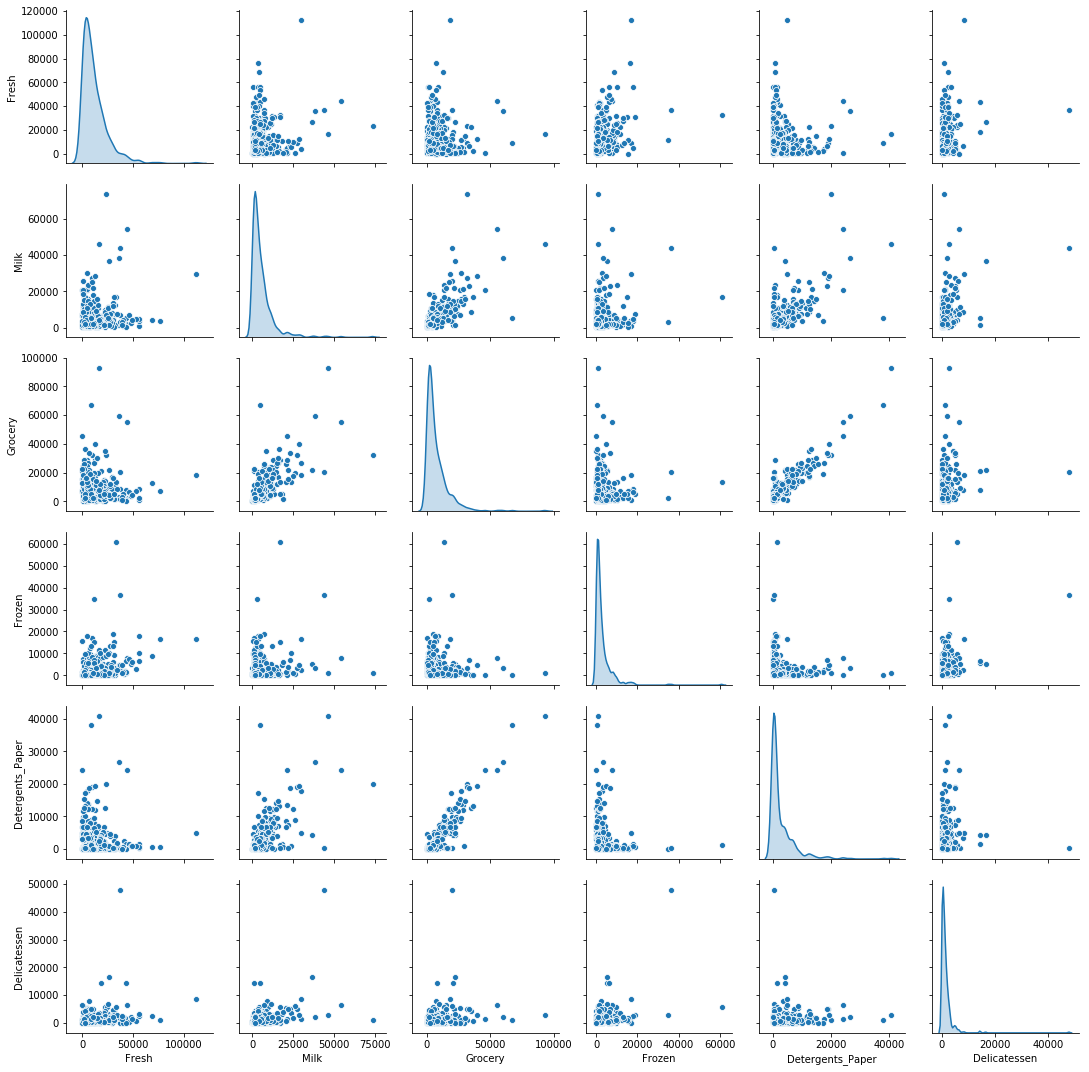

In [52]:
sns.pairplot(data,diag_kind="kde")

In [53]:
corr = data.corr(method='pearson', min_periods=1)
display(corr)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


---
# Heat Map to analyze linear correlation between dataframe variables

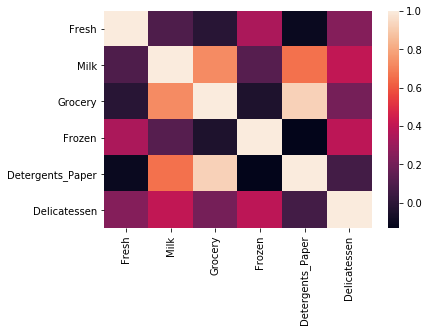

In [54]:
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

---
# Radar Plot

C:\Users\lucch\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


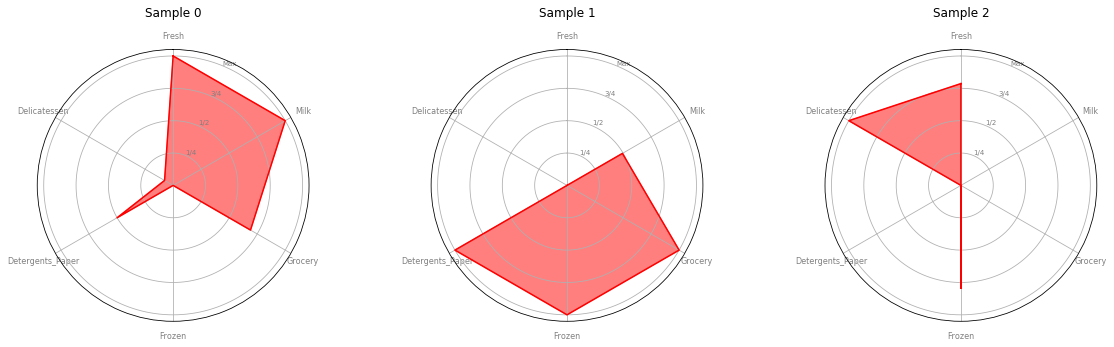

In [55]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

scaler = MinMaxScaler()
df = np.round(samples, 1)
index  = df.index[:]
categories = list(df)
df = scaler.fit_transform(df)*100
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(20, 5))
def Radar(index, title, color):
    ax = plt.subplot(1, 3, index+1, polar=True)
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color ='grey', size = 8)
    plt.yticks((25, 50, 75, 100), ("1/4", "1/2", "3/4", "Max"), color = "grey", size = 7)
    values = df[index]
    values = np.append(values, values[:1])
    ax.plot(angles, values, color = color)
    ax.fill(angles, values, color=color, alpha=0.5)
    plt.title('Sample {}'.format(title), y= 1.1)

for i, n in enumerate(index):
    Radar(index=i, title=n, color='r')

---
# ToDo Feature Relevance

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Data categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper','Delicatessen']

#TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'],axis=1, inplace = False)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data , data['Detergents_Paper'], test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print ("Score:",np.round(score,4))

Score: 0.7287


---
## Features that detergent paper is most correlated

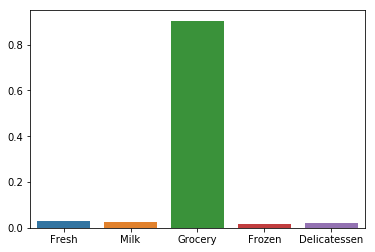

In [57]:
import seaborn as sns
sns.barplot(X_train.columns, regressor.feature_importances_)

---

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

## **Answer:**

With the proposed analysis, training a supervised regression learner to investigate the features correlation was done. The column 'detergent_paper' was tested over all the data-frame features getting a higher score than the other ones:

- Score = 0.7287

Detergents Paper is a trace to someone who goes more frequently to a market than a coffee shop for example. A "market " person is a type of consumer which has a favorite market brand or even a friend warehouse, being a fidelity user of these establishments. This variable could be used as a PC to a new variable "market"  with lower information loss, for example.

---


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

In [58]:
# Produce a scatter matrix for each pair of features in the data
# Already shown above
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

C:\Users\lucch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.
C:\Users\lucch\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


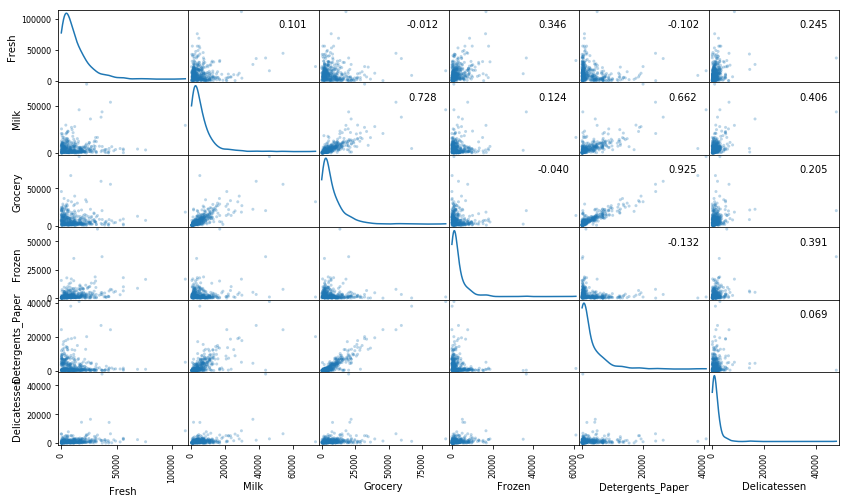

In [59]:
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

---

**Answer:**

1) Using the Pandas function Scatter matrix, the dataset with the original units had a distinguished behavior. It 's skewed to the right, having a long tail to the right having the mean and median values to the right of the mode (unimodal distribution). The direction of skew is where the outliers are located.

2) There are some probably correlated variables ->Y(X): 

- Milk (0.662) and Grocery (0.925)

3) Before reading the last explanation:

"**If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.**"

My variable choice was guided by the opposite reasoning explained. I thought that a high correlation score indicates that this feature is relevant to predict a type of customer. But eventually is the feature interdependence that counts, which just that variable is enough to predict a customer.

---

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

## Applying pairplot to all dataframe

C:\Users\lucch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


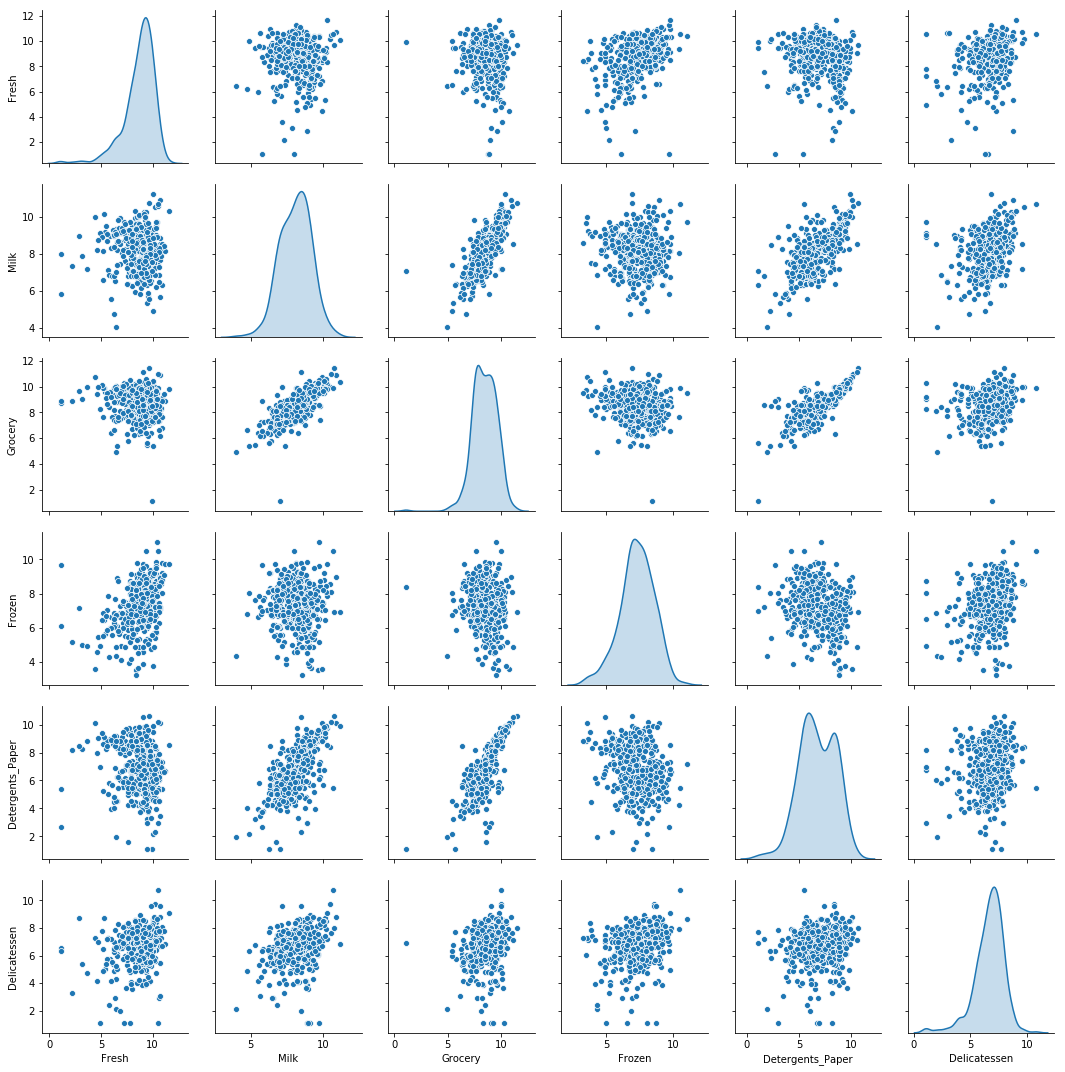

In [60]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
sns.pairplot(log_data,diag_kind="kde")

---

## Applying seaborn pairplot to the samples chosen in the project initial steps, to see how the samples are located into the data

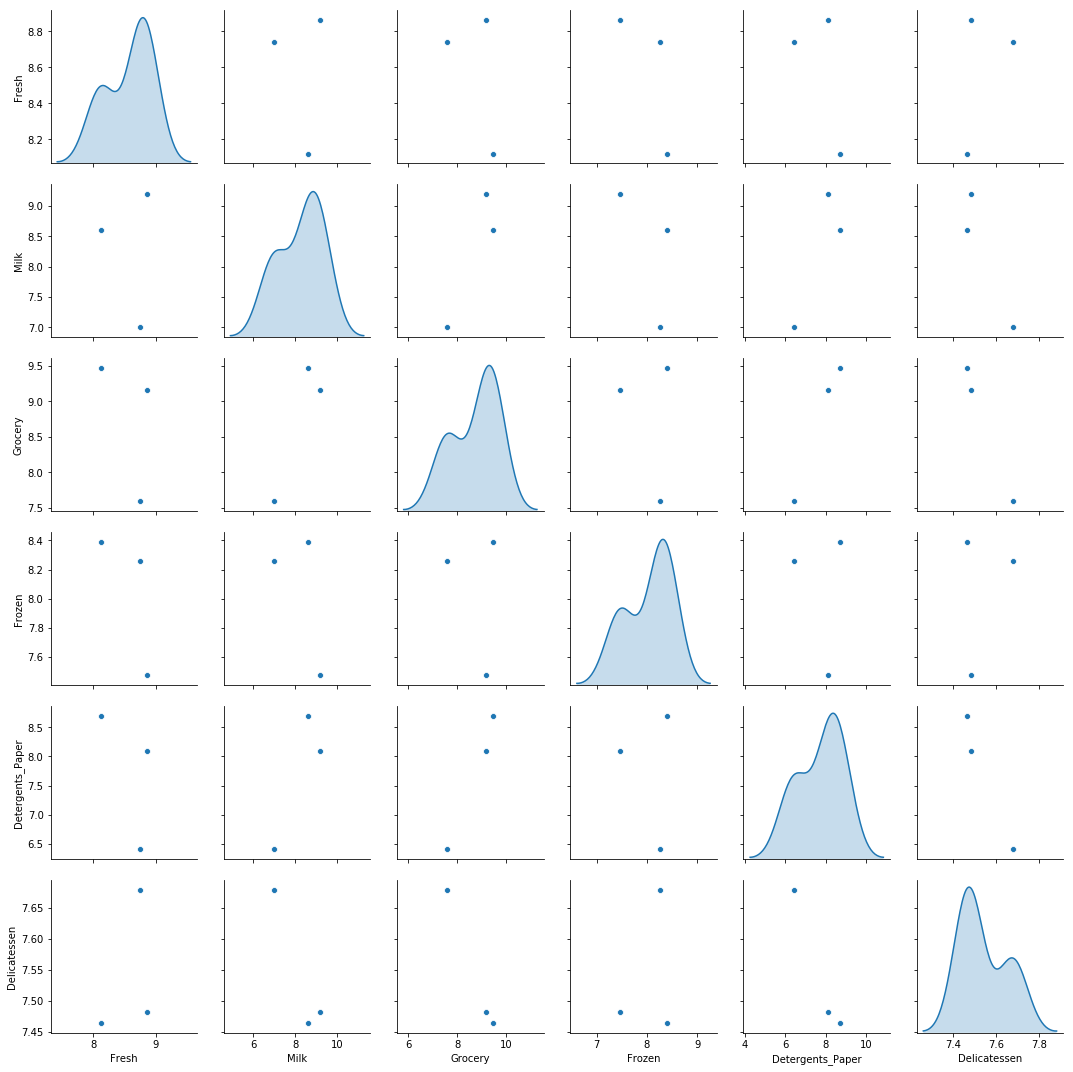

In [61]:
sns.pairplot(log_samples,diag_kind="kde")

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [62]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
2,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789


---

# Describe the statistic metrics from the logarithmic data

In [63]:
print("Position matrics of Logarithmic data: ")
display(log_data.describe())

Position matrics of Logarithmic data: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


---

# Correlation matrix from logarithmic data

In [64]:
print("Correlation matrix to normalized data: ")
corr_1 = log_data.corr(method='pearson', min_periods=1)
display(corr_1)

Correlation matrix to normalized data: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


---

# Heat Map from logarithmic data

Heat map to normalized data: 


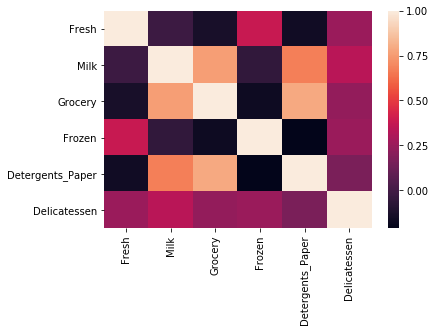

In [65]:
print("Heat map to normalized data: ")
sns.heatmap(corr_1, xticklabels = corr_1.columns.values, yticklabels = corr_1.columns.values)

---

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

---
# Analyzing outliers from seaborn box-plot

In [66]:
print("DataFrame 'log_data' columns: ")
display(log_data.columns)

DataFrame 'log_data' columns: 


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

---
## Fresh

count    440.000000
mean       8.730544
std        1.480071
min        1.098612
25%        8.048059
50%        9.048286
75%        9.737064
max       11.627601
Name: Fresh, dtype: float64

[]

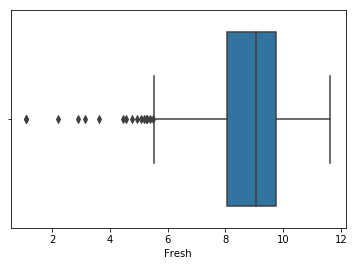

In [67]:
display(log_data['Fresh'].describe())
#display(log_data['Fresh'].value_counts(dropna=False))
_ = sns.boxplot(log_data['Fresh'])
plt.plot()

---

## Milk

count    440.000000
mean       8.121047
std        1.081365
min        4.007333
25%        7.334981
50%        8.196159
75%        8.880480
max       11.205013
Name: Milk, dtype: float64

[]

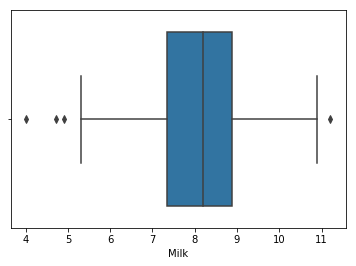

In [68]:
display(log_data['Milk'].describe())
#display(log_data['Milk'].value_counts(dropna=False))
_ = sns.boxplot(log_data['Milk'])
plt.plot()

---

## Grocery

count    440.000000
mean       8.441169
std        1.116172
min        1.098612
25%        7.674616
50%        8.467057
75%        9.273854
max       11.437986
Name: Grocery, dtype: float64

[]

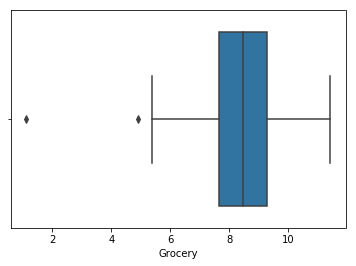

In [69]:
display(log_data['Grocery'].describe())
#display(log_data['Grocery'].value_counts(dropna=False))
_ = sns.boxplot(log_data['Grocery'])
plt.plot()

---

## Frozen

count    440.000000
mean       7.301396
std        1.284540
min        3.218876
25%        6.609678
50%        7.330388
75%        8.175896
max       11.016479
Name: Frozen, dtype: float64

[]

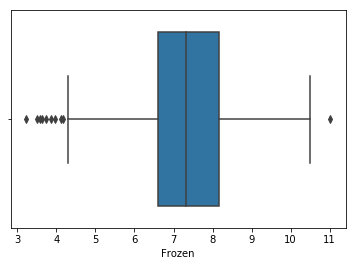

In [70]:
display(log_data['Frozen'].describe())
#display(log_data['Frozen'].value_counts(dropna=False))
_ = sns.boxplot(log_data['Frozen'])
plt.plot()

---

## Detergent paper

count    440.000000
mean       6.785972
std        1.721020
min        1.098612
25%        5.548101
50%        6.705018
75%        8.274341
max       10.617099
Name: Detergents_Paper, dtype: float64

[]

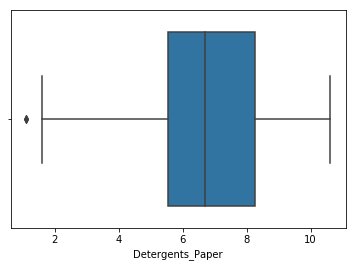

In [71]:
display(log_data['Detergents_Paper'].describe())
#display(log_data['Detergents_Paper'].value_counts(dropna=False))
_ = sns.boxplot(log_data['Detergents_Paper'])
plt.plot()

---

## Delicatessen

count    440.000000
mean       6.665133
std        1.310832
min        1.098612
25%        6.011875
50%        6.872645
75%        7.506728
max       10.777768
Name: Delicatessen, dtype: float64

[]

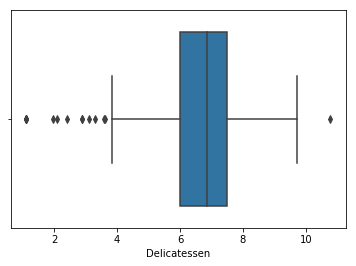

In [72]:
display(log_data['Delicatessen'].describe())
#display(log_data['Delicatessen'].value_counts(dropna=False))
_ = sns.boxplot(log_data['Delicatessen'])
plt.plot()

---

## Outliers detection

In [73]:
# For each feature find the data points with extreme high or low values
outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    outliers += feature_outliers.index.tolist()




Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


# Checking repeated outliers

In [74]:
# Check the comun outliers
from scipy import stats

# Check the repeated outliers
repeated_outliers = {i:outliers.count(i) for i in outliers}
repeated_outliers_descending = sorted(repeated_outliers.items(), key=lambda kv: kv[1], reverse=True)
#display(repeated_outliers_descending)

print("Number of outliers: ", len(outliers))
print("Outliers: ", outliers)
print("")
print("Number of repeat outliers: ", len([154,65,66,128,75]))
print("Repeat outliers: ", [154,65,66,128,75])

# Remove the outliers, if any were specified
tt = [154,65,66,128,75]
good_data = log_data.drop(log_data.index[tt]).reset_index(drop = True)

Number of outliers:  48
Outliers:  [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

Number of repeat outliers:  5
Repeat outliers:  [154, 65, 66, 128, 75]


---
## Display the repeated outliers

In [75]:
display(log_data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [76]:
print("Repeated outliers: ")
print("")
display(log_data.loc[[154,65,66,128,75]])

Repeated outliers: 



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


---

## Examine these duplicate data points further with a heatmap in the original data

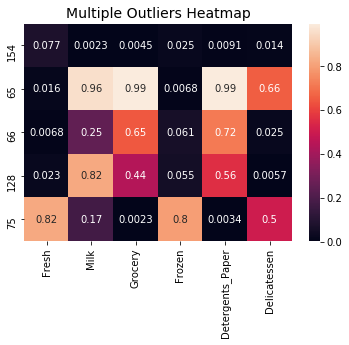

In [77]:
# Heatmap using percentiles to display outlier data
import matplotlib.pyplot as plt
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = percentiles.iloc[[154,65,66,128,75]]
plt.title('Multiple Outliers Heatmap', fontsize=14)
heat = sns.heatmap(percentiles, annot=True)
display(heat)

---

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

---
**Answer:**

Checking the above tables and plots, there are some values in the dataset with common outliers that are lower or higher values than the IQR.An outlier is a measured state that indicates bad data (noise), located far from the median, mode and mean values of a normal distribution. Might be incorrectly data sensing or wrong manually inserted in a questionary, for example.  So many situations to generating outliers, that every data engineer must be aware of these type of circumstances. 

In some cases, it may not be possible to determine if an outlying point is bad data. In layman's terms, an extra tall and weighted person could appear in health conditions dataset. Even so far from the IQR, those may indicate good data. Despite that, if the values are visually outliers from graphing exploration, that must be considered on the data analysis process. This measures could be deleted or changed by the time series mean value if there are few samples in that, for example.

K-means clustering technique uses the short Euclidean distances between the random centroid and the data around it. Some noise could affect the centroid position convergence sometimes. With noise data, DBSCAN could work more efficiently than K-means.

---

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Principal axes in feature space 
 [[ 0.16746374 -0.40143866 -0.43811142  0.17820975 -0.75142613 -0.14987105]
 [-0.68593522 -0.16722783 -0.07072902 -0.50054207 -0.04244398 -0.49414702]
 [-0.67738927  0.04020501 -0.01953317  0.31504299 -0.21170161  0.62855082]
 [-0.204293    0.01281068  0.05567564  0.78544905  0.20961368 -0.54233972]
 [-0.00261356  0.71923846  0.3553861  -0.0330861  -0.55815441 -0.20918629]
 [ 0.02915623 -0.54018269  0.82053348  0.02054106 -0.18238824  0.01974794]]
The estimated number of components  6
Percentage of variance explained  [0.44302505 0.26379218 0.1230638  0.10120908 0.04850196 0.02040793]


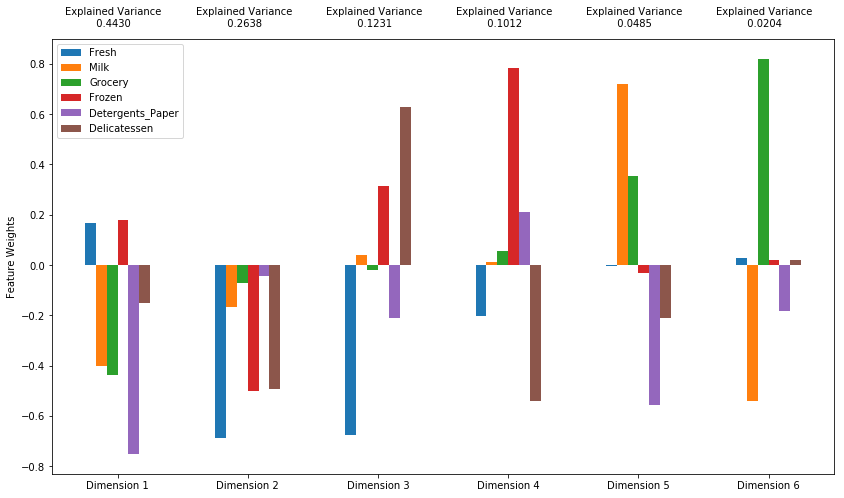

In [78]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# Principal axes in feature space, representing the directions of maximum variance in the data.
print("Principal axes in feature space \n", pca.components_)

# The estimated number of components. 
print("The estimated number of components ", pca.n_components_)

# Percentage of variance explained by each of the selected components.
print("Percentage of variance explained ",pca.explained_variance_ratio_)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

---
## Checking the number of PC's

In [79]:
from numpy import linalg as LA
data_covariance_matrix = np.cov(good_data)
data_variance_matrix = np.var(good_data)
#display(good_data.corr())
#print("Variance matrix from normalized data")
#print(data_variance_matrix)
#print("Covariance matrix from normalized data")
#print(data_covariance_matrix.shape)

eigenvalues_from_cov_matrix, eigenvectors_from_cov_matrix = LA.eig(data_covariance_matrix)
#print("Eigenvalues from the coveriance matrix")
#print((np.absolute(eigenvalues_from_cov_matrix)))
#print("Eigenvectors from the coveriance matrix")
#print(eigenvectors_from_cov_matrix)

---

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

- First = 0.44237417 of variance 
- Second = 0.27657107 of variance
- Total variance = 0.7068;the first two components have 70.68% of the total information from the data. The information loss will be roughly 30% using these two PC's.
  
- First Four = \[0.44237417 0.27657107 0.11617342 0.09617719\] are the higher variances between the PC's. 
The total variance is of these four PC's is 0.932 that means, 7% of the information will be lost with these new dimensions.

- Covariance Matrix 4 greater eigenvalues = \[4.34882447e+02 2.85833320e+02 7.64320218e+01 7.39456975e+01\]

PCA - Principal Component Analysis

Pca is a tool vastly used in Computer Vision kernels, due it's a high dimensional data structure. When a prediction model is created over those dataset types, overfitting is an inevitable consequence due to a large number of variables used. To support this type of problem PCA is applied. The mathematical procedure of PCA is explained as follows:

- Data normalization: Features are scaled to a common measurement unit to not overweight some features in the model construction;

- Covariance matrix calculation: Covariance matrix is a square matrix, where the variances (one of the measures of how data is spread) is located at the main diagonal and the other elements are the covariance (how the variables are correlated) between x and y value for example. It could be negative when one dimension increase and the other decrease; positive, when both dimensions increase; Zero, when the dimensions are independent of each other;

- Eigenvalues and the eigenvectors calculation from the covariance matrix: Vectors that has the correlation with the original matrix and the eigenvalues, originated from the characteristic equation. It's a base transformation, in other words, a different way to represent a certain matrix. The eigenvalues are the magnitude of the vector and the eigenvectors the amount of the magnitude distributed in **n** directions; 

- Data transformation: The highest eigenvalues from the eig_val/eig_vector combination are chosen to participate in the principal components. A lower dimension system, seeking the minimal loss of information on data transformation is determined. Therefore, the transpose of the new vectors to create the new dimensions are multiplicated by the original matrix, originating the new data.

---

- PC1 = Customer 1
  - Det_paper = -0.75
  - Grocery = -0.43
  - Milk = -0.40

PC1 increases when det_paper, grocery, and milk decreases. This customer segment does not consume a substantial amount of these items and the det_paper is the product that correlates the most PC1. PC1 looks like a Restaurant, that does not spend many on those items instead of frozen or fresh it does.

---

- PC2 = Customer 2
  - Fresh = -0.68
  - Frozen = -0.50
  - Delicateseen = -0.49

PC2 increases when Fresh, Frozen and Delicatessen decreases.
This customer segment has a weak relation with all these items. The most relevant feature is Fresh, which may indicate a customer that does not spend many of these products. That could be a Tech shop for example.

---

- PC3 = Customer 3
  - Fresh = -0.67
  - Delicateseen = 0.62

PC3 increases when Fresh decrease and Delicatessen increase.
PC3 could be a Delicatessen shop, as this product is the most important in this dimension. In Brazil, there are shops selling just this segment.

---

- PC4 = Customer 3
  - Frozen = 0.78
  - Delicateseen = -0.54

The PC4 increases when delicatessen decreases and Frozen increases. That could be a Fishmonger that sells Frozen fish as it's the main item for example.


### REFERENCE

[1] CHEN, Chi-Tsong. Linear system theory and design. Oxford University Press, Inc., 1998.

[2] HAN, Jiawei; PEI, Jian; KAMBER, Micheline. Data mining: concepts and techniques. Elsevier, 2011.

[3] A tutorial on Principal Components Analysis, Lindsay I Smith Notes found in https://www.researchgate.net/publication/261404279_A_Tutorial_on_Principal_Component_Analysis

[4]Interpretation of the Principal Components, https://newonlinecourses.science.psu.edu/stat505/node/54/

---

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [80]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7887,-0.8123,0.2315,-0.0036,0.1194,-0.2106
1,-2.0887,-0.7006,0.8537,1.0105,-0.5587,0.2495
2,1.1404,-0.6710,0.9823,0.0603,-1.1423,0.0055


---

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941


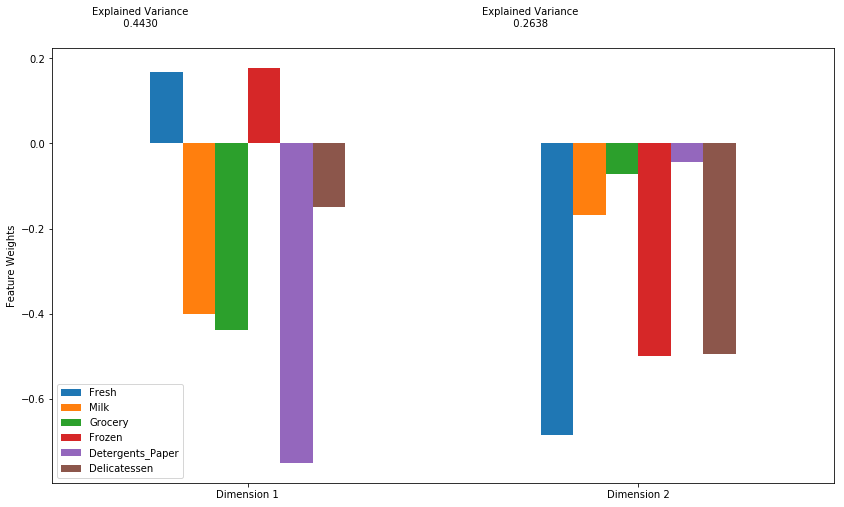

In [81]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.pca_results(good_data, pca)

---

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [82]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7887,-0.8123
1,-2.0887,-0.7006
2,1.1404,-0.6710


---

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

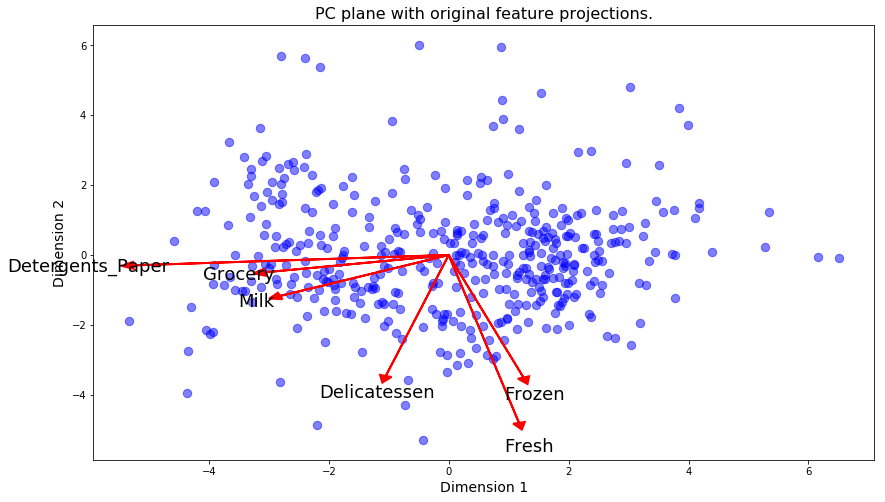

In [83]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

---

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

---

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

1) K-means:

K-means is based on spherical clusters which centroids and the shortest Euclidean distances between it and the data points determines which samples belong to the nearest centroid. K-means works better on spherical data or compact distributions where clusters are sometimes visually detected.

2) Gaussian Mixture Model (GMM): 

GMM produces non-convex clusters (nonlinear). In fact, k-Means is a special case of GMM, only spherical clusters are produced, such that the probability of one point belong to a certain cluster is 1, and all other probabilities are 0, and the variance is 1. GMM model accommodates mixed membership. Another implication of its structure is that GMM allows for mixed membership of points to clusters.

3) The two cluster methods will be tested with a different number of clusters, to check which one performs better with the following dataset. The internal index (Sillhoutte score) will be used to measure that.

[1]HARTIGAN, John A.; WONG, Manchek A. Algorithm AS 136: A k-means clustering algorithm. Journal of the Royal Statistical Society. Series C (Applied Statistics), v. 28, n. 1, p. 100-108, 1979.

[2]ROMESBURG, Charles. Cluster analysis for researchers. Lulu. com, 2004.

[3]Cluster Using Gaussian Mixture Models, https://www.mathworks.com/help/stats/clustering-using-gaussian-mixture-models.html

---

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

---
"At this part, the two methods are tested to a different number of clusters and the silhouette score is calculated to compare the method's performance."

---
## K-Means

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def K_Means_clusters(k):
    global clusterer_k_means,preds_k_means,centers_k_means,sample_preds_k_means,score_k_means
    
    clusterer_k_means = KMeans(n_clusters=k, random_state=0).fit(reduced_data)
    preds_k_means = clusterer_k_means.predict(reduced_data)
    centers_k_means = clusterer_k_means.cluster_centers_
    sample_preds_k_menas = clusterer_k_means.predict(pca_samples)
    score_k_means = silhouette_score(reduced_data, preds_k_means)
    #vs.cluster_results(reduced_data, preds_k_means, centers_k_means, pca_samples)
    return score_k_means

---
## GMM

In [85]:
from sklearn.mixture import GaussianMixture

def gaussian_mixture_clusters(k):
    global gmm,pred_gmm,gmm_sample_preds,gmm_score
    
    gmm = GaussianMixture(n_components=k, random_state=0).fit(reduced_data)
    pred_gmm = gmm.predict(reduced_data)
    #centers_k_means = gmm.cluster_centers_
    gmm_sample_preds = gmm.predict(pca_samples)
    gmm_score = silhouette_score(reduced_data, pred_gmm)
    #vs.cluster_results(reduced_data, pred_gmm,centers_k_means, pca_samples)
    return gmm_score


---

## Create silhoute score for both methods and visualizing the number of clusters in the following methods. First GMM to \[i\] number of clusters and second follows by K-Means \[i\] number of cluster.



In [86]:
results = pd.DataFrame(columns=['Silhouette Score GMM','Silhouette Score K-Means'])
results.columns.name = 'Number of Clusters' 

for k in range(2,9):
    results = results.append({'Silhouette Score GMM': gaussian_mixture_clusters(k), 'Silhouette Score K-Means': K_Means_clusters(k)}, ignore_index=True)


Number of Clusters,Silhouette Score GMM,Silhouette Score K-Means
0,0.421917,0.426281
1,0.374202,0.396891
2,0.329080,0.332010
3,0.305875,0.350991
4,0.224815,0.366609
5,0.274334,0.363315
6,0.344370,0.350994


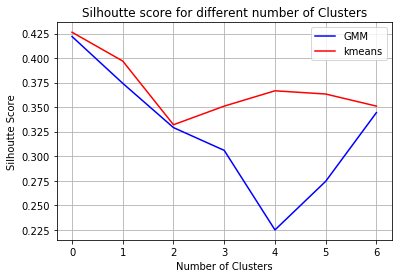

In [87]:
display(results)
gmm = results['Silhouette Score GMM']
kmeans = results['Silhouette Score K-Means']

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(gmm, c='b',label='GMM')
ax1.plot(kmeans,c ='r',label='kmeans')
plt.title('Silhoutte score for different number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

---

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

For both methods (k-means and GMM) 2 clusters had higher silhouette scores. In the table above, the number 0 is the index 2 on the number of clusters.

---

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [88]:
# Display the results of the clustering from implementation
#vs.cluster_results(reduced_data, preds_k_means, centers_k_means, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


### Creating th PC's to project

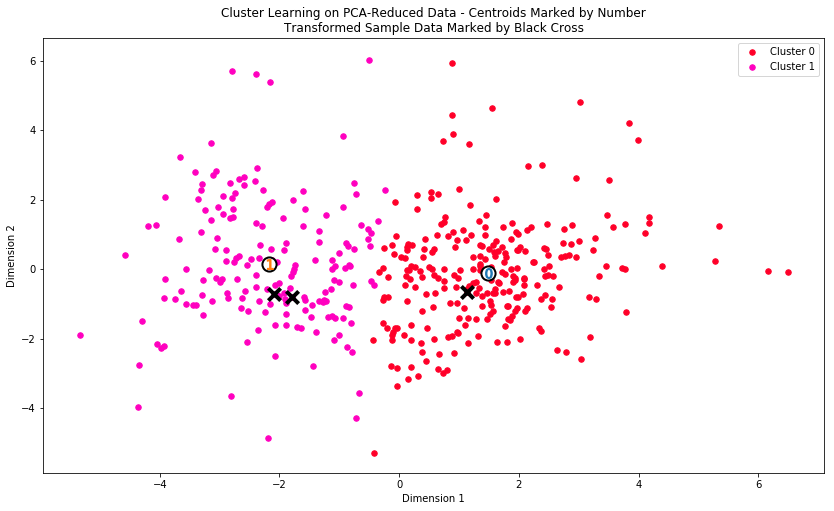

In [89]:
clusterer_k_means_final = KMeans(n_clusters=2, random_state=0).fit(reduced_data)
preds_k_means_final = clusterer_k_means_final.predict(reduced_data)
centers_k_means_final = clusterer_k_means_final.cluster_centers_
sample_preds_k_means_final = clusterer_k_means_final.predict(pca_samples)
score_k_means_final = silhouette_score(reduced_data, preds_k_means_final)
vs.cluster_results(reduced_data, preds_k_means_final, centers_k_means_final, pca_samples)

In [90]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers_k_means_final)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers_k_means_final))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


In [91]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


---
### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

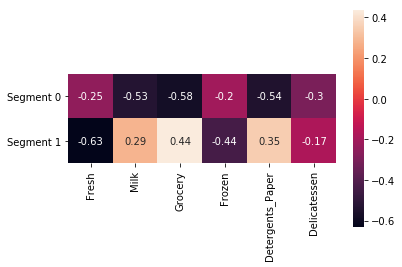

In [92]:
sns.heatmap((true_centers - data.mean())/data.std(ddof=0), square=True,annot=True)

**Answer:**

- 'Fresh' is the most relevant feature in the first segment. That indicates a restaurant/fast-food for example, getting closer to the mean value to all customers in the dataset. 

- 'Milk' and 'Grocery' are the most relevant features in the second segment. That indicates a market/coffee place. 

# Review

---

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [93]:
# Display the predictions
for i, pred in enumerate(sample_preds_k_means_final):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

>**#Sample1 : Sample 1 looks like a market. Milk, Grocery, Det_Paper, and Delicatessen had higher values in these objects compared to the mean value. Items encountered in standard markets.**

>**#Sample2 : Sample 2 looks like a market. Grocery, Frozen, Det_Paper, and Delicatessen. had higher values in these objects compared to the mean value. Items encountered in standard markets.**

>**#Sample3 : Sample 3 looks like a bakery. Frozen and Delicatessen had higher values in these items compared to the mean value. Some products found in the bakery.**

The first sample was firstly indicated to a market as the cluster indicates. Secondly, the last sample indicates a bakery, not so different than a coffee shop and market sold items.

---

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

---
### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The A/B test works with the following procedures:

1) Collect data on visitors behavior and track metrics;

2) Build a hypothesis aimed at increasing conversions;

3) Create a variation based on hypothesis made, and test A/B procedures against the existing version;

4) Stipulate time to achieving statistically significant results;

5) Analyze results and draw conclusions.

Based on this method, the following A/B test will be described:

- Group A: delivery service with 5 days/week

- Group B: delivery service with 3 days/week

The variable to be analyzed is 'Fresh', it has a higher mean value in spendings;So the A/B test will be structured as:


| Test |    Test 1   |    Test 2   |
|:-:|:-----------:|:-----------:|
| A |     50%     |     50%     |
| B |     50%     |     50%     |
| Segment  | (segment 0) | (segment 1) |

It will be 1 month of data collection, enough time to check if the procedure is working. If not, create another plan. Track the mean value on 'Fresh' spendings.

The protocol to analyze results and create conclusions is:

1) If segment 0 get higher values on B, keep B;

2) If segment 1 get higher values on B, keep B;

3) Check how much each segment spend counting both scenarios, eg. Seg_0 = fresh_A + fresh_b; The weight will be assigned to the segment that will spend the most on that item.

4) Control the procedure during a year, checking if the 'Fresh' spending costs are growing or decreasing with that new move. If the cash flow is diminishing, return to the other group.

Some rating procedures could be applied as A/B test, however, that will be a new method.

### REFERENCE

[1] A/B testing, https://en.wikipedia.org/wiki/A/B_testing#Segmentation_and_targeting

[2] The Complete Guide to A/B Testing, https://vwo.com/ab-testing/

---

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The problem, after the clusters have been recognized from the data, becomes a supervised
learning problem to detect which segment the new user will be classified.
Will be information loss during the process due to the PC's formulation, however, if the new features are
describe well the new segment which the entrepreneur is seeking, the
the support system will apply the results to find distinct ways to acquire new users to the product for example.

---

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

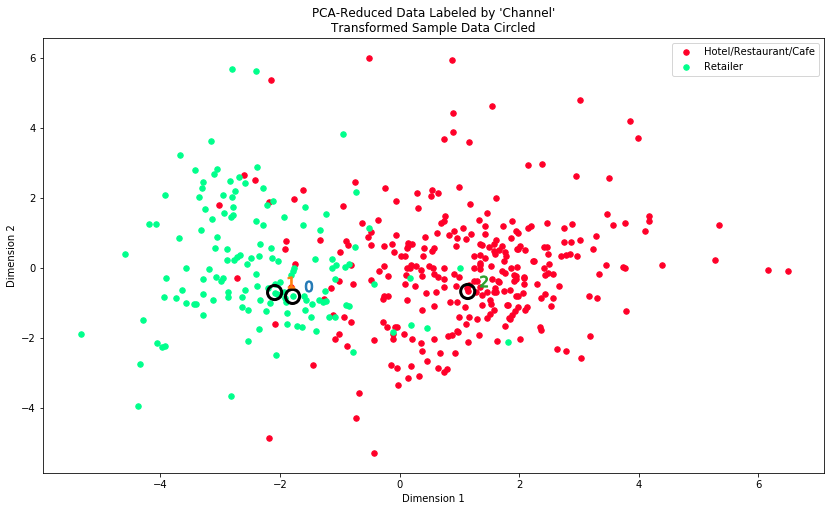

In [94]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data,tt, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

- The clustering algorithm filters pretty well this two type of segments. The chosen samples are fitted correctly on the classes naive ranked at the beginning of the project, however, some items detected were not so relevant to the analysis.

- Yes, if the customer has the 'Fresh' items the most consumed products, this user is inserted in the first class (segment 0) which is the retailer segment principal feature, for example, classified so as purely in the PC created.

- Yes, it's a consistent guess based on a mathematical approach than an empirical guess as I had in the beginning. A probably picked randomly three samples that lied pretty well classified in the newly created dimensions. However, if my samples were in the PC's boundary, for example, that situation could lead to a misunderstood of the whole project's concept without using unsupervised learning concepts.

In [95]:
#find percentage of correctly classified customers
data = pd.read_csv("customers.csv")
data = data.drop(data.index[tt]).reset_index(drop = True)
# might need to switch around the 0 and 1, based on your cluster seed
df = np.where(data['Channel'] == 2, 1, 0)
print("Percentage of correctly classified customers: {:.2%}"
      .format(sum(df == preds_k_means_final)/float(len(preds_k_means_final))))

Percentage of correctly classified customers: 88.97%


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.